In [15]:
import pandas as pd
from matplotlib import pyplot as plt
from pandas import DataFrame

df = pd.read_csv("te_ai_cup_sales_forecasting_data.csv")
business_unit_name_from_simp = {
    'Aerospace, Defense & Marine': "A,D&M",
    'Data and Devices': "D&D",
    'Industrial': "Ind",
    'Industrial Commercial Transportation': "ICT",
    'Appliances': "App",
    'Application Tooling Group': "ATG",
    'Energy': "En",
    'Channel - Industrial': "C-Ind",
    'Channel - Data and Devices': "C-D&D",
    'Channel - Appliances': "C-APP"
}

In [32]:
print("num rows:", len(df))
print("num cols:", df.shape[1])

df = df.replace({'business_unit_group_name': business_unit_name_from_simp})
df["year_week_ordered"] = df['fiscal_year_historical'] + df['fiscal_week_historical']
df.sort_values(by=['fiscal_year_historical'] + ['fiscal_week_historical'], inplace=True, ignore_index=True)
display(df.head())

num rows: 522698
num cols: 10


,fiscal_year_historical,fiscal_quarter_historical,fiscal_month_historical,fiscal_week_historical,business_unit_group_name,company_region_name_level_1,product_line_code,product_line_name,sales_quantity,sales_amount,year_week_ordered
0,2015,1,1,1,En,EMEA,E77,LV/MV Surge Arresters,1641.00,126789.47,2016
1,2015,1,1,1,C-D&D,Asia Pacific & ANZ,053,Memory Sockets,14417.92,17379.52,2016
2,2015,1,1,1,C-Ind,EMEA,202,PLASTI-GRIP Terminals,142820.40,19666.38,2016
3,2015,1,1,1,Ind,Americas,ABP,Specific terminal blocks,14528.00,-12089.77,2016
4,2015,1,1,1,D&D,EMEA,AC5,"Antennas, Custom Others",34400.00,30357.47,2016


In [33]:
u_business_unit = df["business_unit_group_name"].unique()
print("Unique Business Unit:\n", u_business_unit, "\n")
u_company_region = df["company_region_name_level_1"].unique()
print("Unique Company Region:\n", u_company_region, "\n")
u_years = df["fiscal_year_historical"].unique()
print("Unique Fiscal Year:\n", u_years, "\n")
u_prod_code = df["product_line_code"].unique()
print("Unique Fiscal Year:\n", u_prod_code, "\n")

Unique Business Unit:
 ['En' 'C-D&D' 'C-Ind' 'Ind' 'D&D' 'App' 'A,D&M' 'ICT' 'ATG' 'C-APP'] 

Unique Company Region:
 ['EMEA' 'Asia Pacific & ANZ' 'Americas'] 

Unique Fiscal Year:
 [2015 2016 2017 2018 2019 2020 2021 2022] 

Unique Fiscal Year:
 ['E77' '053' '202' 'ABP' 'AC5' '607' 'AC6' '088' 'H98' 'DK4' 'N65' '372'
 'FG2' '251' '208' 'F49' 'H90' 'J67' 'J63' '073' '351' '050' 'K70' '301'
 'J37' 'A13' 'AQ9' '038' '025' '440' '481' '145' '230' 'K85' 'JB3' '547'
 '239' '912' '281' '231' 'LT0' '214' 'JF1' 'A28' '567' 'B91' '438' '430'
 'K00' 'J89' 'E31' 'Z27' '291' 'Z83' 'G60' '518' '472' 'F52' 'G59' '042'
 'N09' '323' '715' 'A05' '072' '397' '957' 'J25' '217' '014' '224' 'G49'
 '344' '207' 'AP2' '002' '529' '077' 'E82' '835' 'LV4' '728' '890' '032'
 '757' 'E79' '097' 'Z34' '057' 'F38' 'Z43' 'F83' 'F82' 'G74' 'AG7' '685'
 '977' '009' 'A92' '712' 'F50' '001' 'JH4' '402' '124' '023' '961' '313'
 'G61' 'F48' '056' 'G41' '232' '766' '519' 'J12' '243' 'LV1' '204' 'F41'
 '450' '516' 'W02' 'Z40

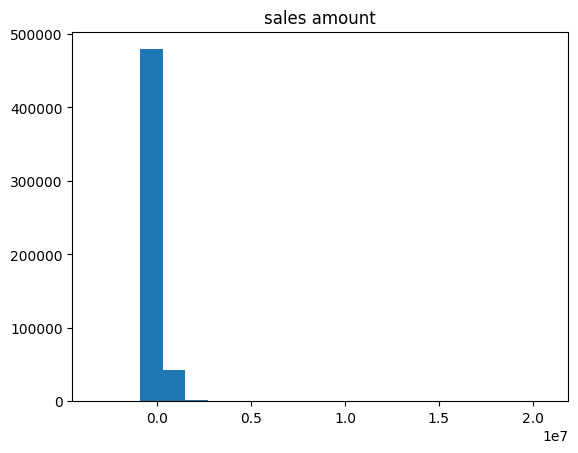

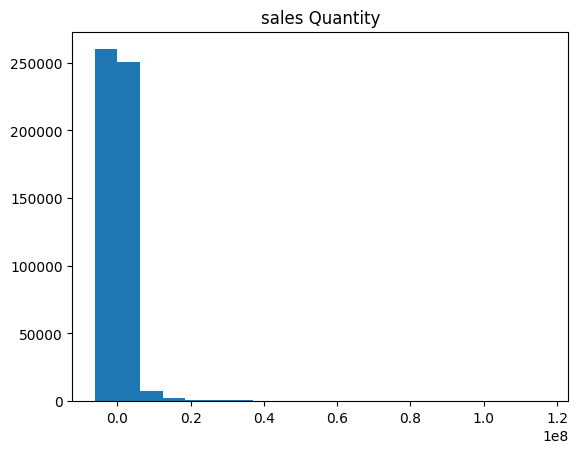

In [34]:
plt.hist(df['sales_amount'], bins=20)
plt.title("sales amount")
plt.show()
plt.title("sales Quantity")
plt.hist(df['sales_quantity'], bins=20)
plt.show()

In [35]:
def display_cmp(cmp_col, cmp_val, unique_col_list):
    data_dict = {}
    grouped_df = df.groupby(cmp_col)
    for col_group in unique_col_list:
        data_dict[col_group] = grouped_df.get_group(col_group)[cmp_val]

    fig, ax = plt.subplots()
    ax.boxplot(data_dict.values())
    ax.set_xticklabels(data_dict.keys())
    plt.title(cmp_val + " by " + cmp_col)
    plt.show()

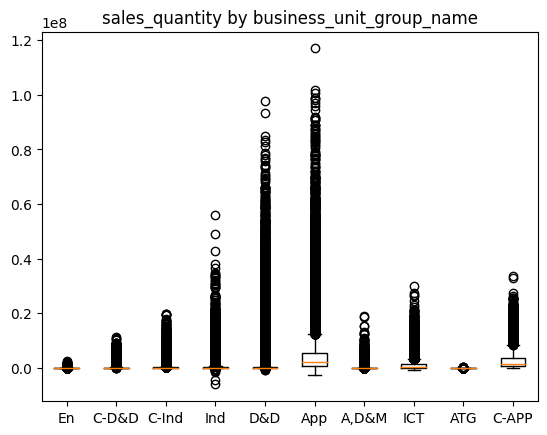

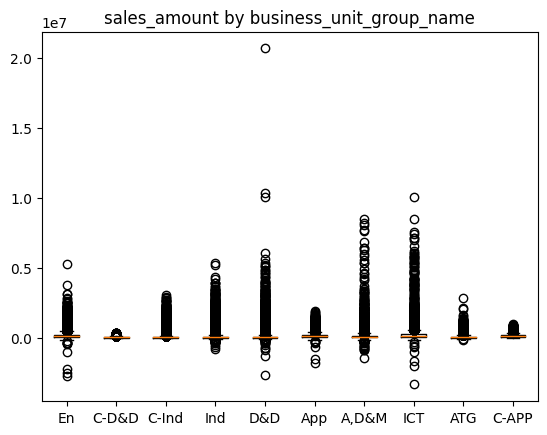

In [36]:
display_cmp('business_unit_group_name', 'sales_quantity', u_business_unit)
display_cmp('business_unit_group_name', 'sales_amount', u_business_unit)

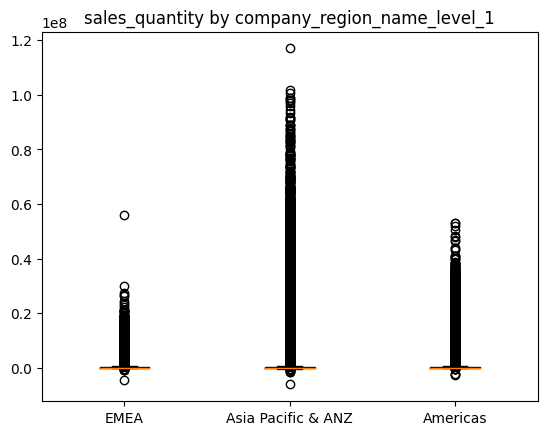

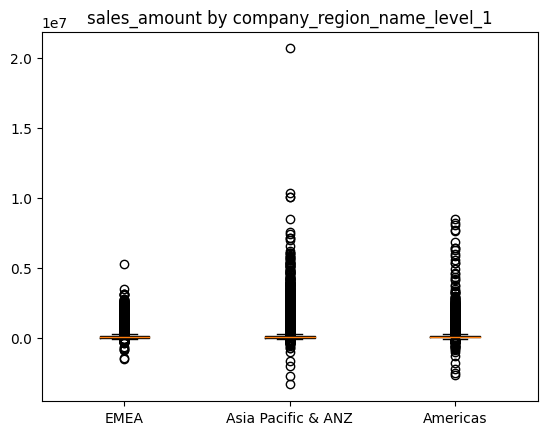

In [37]:
display_cmp('company_region_name_level_1', 'sales_quantity', u_company_region)
display_cmp('company_region_name_level_1', 'sales_amount', u_company_region)

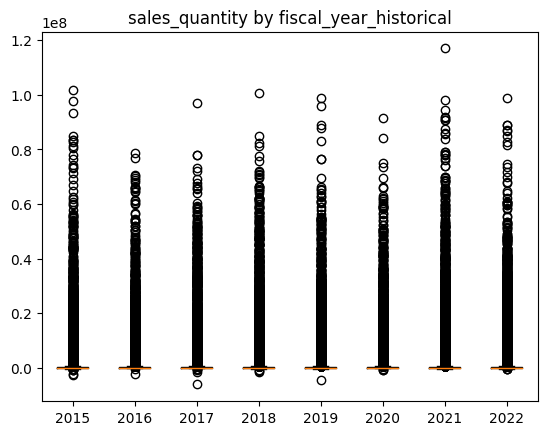

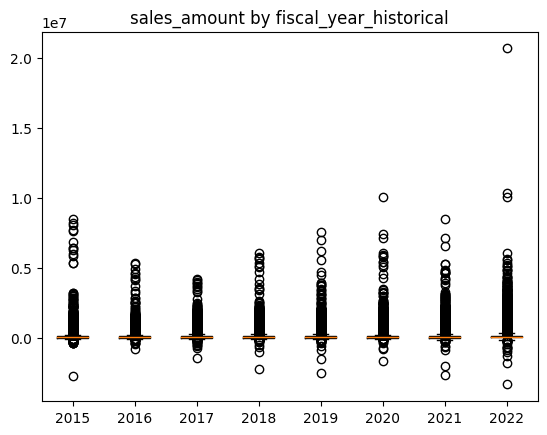

In [38]:
display_cmp('fiscal_year_historical', 'sales_quantity', u_years)
display_cmp('fiscal_year_historical', 'sales_amount', u_years)